In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline

from subprocess import check_output

import warnings                                            # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

#Here are some methods we need to write that will enhace our dataset
def find_null_values(dataset):
		'''This function checks for null values and prints out the amount if there are any
		Args:
		 dataset: an object representation of our dataset
		'''
		dataset.isnull().sum()
		num_null = dataset.isnull().sum().sum()
		print("No of Null Values: {}".format(num_null))

def replace_null_fiber_values(dataset):
		dataset['fiber'].fillna(0)
        
def replace_null_sugar_values(dataset):
		dataset['sugar'].fillna(0)
        
def replace_null_protein_values(dataset):
		dataset['protein'].fillna(0)

def replace_null_vitA_values(dataset):
		dataset['vit_a'].fillna(0)
        
def replace_null_vitC_values(dataset):
		dataset['vit_c'].fillna(0)

def replace_null_calc_values(dataset):
		dataset['calcium'].fillna(0)

def display_post_profiling(dataset):
		'''This method displays the post profiling
		Args:
		 dataset: an object representation of our dataset
		 '''
		print(dataset.columns)
		print(dataset['restaurant'].unique())
        
def totalfat_asc(dataset):
    '''This method orders by total fat ascending order'''
    return dataset.sort_values(by=['total_fat'])
    
def totalcarb_asc(dataset):
    '''This method orders by total carb ascending order'''
    return dataset.sort_values(by=['total_carb'])

def totalfat_desc(dataset):
    '''This method orders by total fat descending order'''
    return dataset.sort_values(by='total_fat', ascending=False)
    
def totalcarb_desc(dataset):
    '''This method orders by total carb descending order'''
    return dataset.sort_values(by='total_carb', ascending = False)
    
def calories_asc(dataset):
    '''This method orders by the amount of calories '''
    return dataset.sort_values(by=['calories'])
        
def calories_desc(dataset):
    '''This method orders by the amount of calories '''
    return dataset.sort_values(by='calories', ascending = False)

In [2]:
#importing the data to the notebook
try:
    data = pd.read_csv("/Users/cospina/Downloads/fastfood.csv")
except:
    print("Error: File not found in directory")
data.head(6)


,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
5,Mcdonalds,Big Mac,540,250,28,10.0,1.0,80,950,46,3.0,9,25.0,10.0,2.0,15.0,Other


In [3]:
#Before we can profile our dataset we need to understand it
data.shape

(515, 17)

In [4]:
data.columns

Index(['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat',
       'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar',
       'protein', 'vit_a', 'vit_c', 'calcium', 'salad'],
      dtype='object')

In [5]:
data.tail(6)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
509,Taco Bell,Original Triple Double Crunchwrap,700,270,30,9.0,0.5,45,1550,85,9.0,7,23.0,15.0,6.0,25.0,Other
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,Other
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,Other
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,Other
514,Taco Bell,Fiesta Taco Salad-Steak,720,320,36,8.0,1.0,55,1340,70,8.0,8,28.0,NaN,NaN,NaN,Other


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [7]:
data.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


In [8]:
#Now it is time to preprocess the data
#now time to check for the values
find_null_values(data)

No of Null Values: 647


In [9]:
replace_null_fiber_values(data)
replace_null_sugar_values(data)
replace_null_protein_values(data)
replace_null_vitC_values(data)
replace_null_calc_values(data)

In [10]:
display_post_profiling(data)

Index(['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat',
       'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar',
       'protein', 'vit_a', 'vit_c', 'calcium', 'salad'],
      dtype='object')
['Mcdonalds' 'Chick Fil-A' 'Sonic' 'Arbys' 'Burger King' 'Dairy Queen'
 'Subway' 'Taco Bell']


# Now it is time for data visualization

# We will use seaborn and matlab for this

In [11]:
#first let us filter all items to McDonalds and sort everything in descending order by calories
filtereddata = data[data.restaurant == "Mcdonalds"]
sorteddata = calories_desc(filtereddata)
sorteddata.head(6)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,2430,1270,141,24.0,2.0,475,6080,103,2.0,3,186.0,0.0,2.0,8.0,Other
44,Mcdonalds,40 piece Chicken McNuggets,1770,960,107,18.0,0.5,295,3370,105,7.0,1,98.0,0.0,15.0,6.0,Other
47,Mcdonalds,10 piece Sweet N' Spicy Honey BBQ Glazed Tenders,1600,600,66,10.0,0.0,265,4450,156,5.0,87,97.0,8.0,40.0,10.0,Other
38,Mcdonalds,12 piece Buttermilk Crispy Chicken Tenders,1510,790,88,15.0,1.0,295,3770,64,1.0,2,115.0,0.0,2.0,6.0,Other
37,Mcdonalds,10 piece Buttermilk Crispy Chicken Tenders,1210,630,70,12.0,1.0,240,3230,52,1.0,4,94.0,0.0,0.0,4.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other


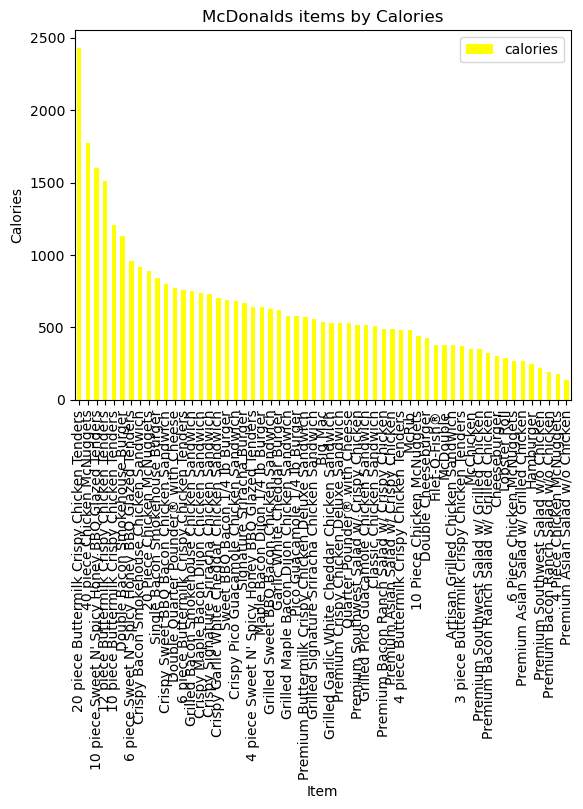

In [17]:
#Now we can visulaize the data with going by the item and the amount of calories it has
sorteddata.plot(kind="bar", x="item", y="calories", color="yellow")
plt.title("McDonalds items by Calories")
plt.xlabel("Item")
plt.ylabel("Calories")
try:
    plt.show()
except:
    print("Data visualization error") 
